### Importing necessary libraries 

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

### Configuring GPU

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

IndexError: list index out of range

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

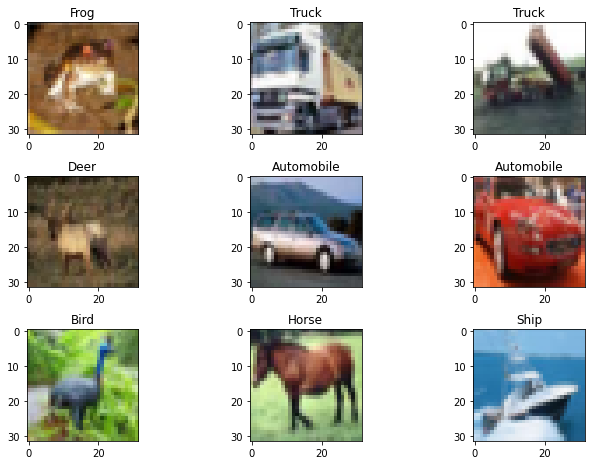

In [7]:
i=1
plt.figure(figsize=(10, 8))
for images in X_train[0:9]:
    plt.subplot(3, 3, i)
    plt.imshow(images)
    plt.title(labels[int(y_train[i-1])])
    i+=1
    plt.subplots_adjust(wspace=1)

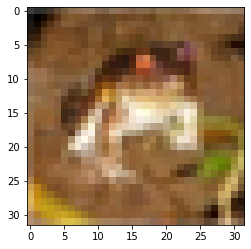

In [8]:
plt.imshow(X_train[0])

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
num_epochs = 50

### ANN Model - 1

In [11]:
ann_model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])


ann_model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
ann_model_history = ann_model.fit(x=X_train, y=y_train, epochs=num_epochs)

Epoch 1/50
1563/1563 [==============================] - 3s 1ms/step - loss: 12.4140 - accuracy: 0.1262
Epoch 2/50
1563/1563 [==============================] - 2s 1ms/step - loss: 11.7825 - accuracy: 0.1026
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.1143
Epoch 4/50
1563/1563 [==============================] - 2s 2ms/step - loss: 2.3029 - accuracy: 0.1119
Epoch 5/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1121
Epoch 6/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3031 - accuracy: 0.1109
Epoch 7/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3026 - accuracy: 0.1111
Epoch 8/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3026 - accuracy: 0.1128
Epoch 9/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3026 - accuracy: 0.1147
Epoch 10/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3

### ANN Model - 2

In [13]:
ann_model_2 = keras.Sequential([
    keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


ann_model_2.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
ann_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 982us/step - loss: 2.3026 - accuracy: 0.1117


[2.30259108543396, 0.11169999837875366]

In [15]:
ann_model_2_history = ann_model_2.fit(x=X_train, y=y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0248 - accuracy: 0.2896
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7215 - accuracy: 0.3843
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6679 - accuracy: 0.4086
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6127 - accuracy: 0.4279
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5874 - accuracy: 0.4357
Epoch 6/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5535 - accuracy: 0.4448
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5470 - accuracy: 0.4531
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5238 - accuracy: 0.4584
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5198 - accuracy: 0.4598
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.493

### CNN Model

In [16]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid',input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),   
    keras.layers.Flatten(),
    keras.layers.Dense(10,activation='softmax')
])


cnn_model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
cnn_model_history = cnn_model.fit(x=X_train, y=y_train, epochs=num_epochs)

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6648 - accuracy: 0.4126
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2235 - accuracy: 0.5741
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1284 - accuracy: 0.6120
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0710 - accuracy: 0.6291
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0075 - accuracy: 0.6525
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9631 - accuracy: 0.6660
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9211 - accuracy: 0.6851
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8912 - accuracy: 0.6928
Epoch 9/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8536 - accuracy: 0.7062
Epoch 10/50
1563/1563 [==============================] - 15s 9ms/step - l

In [18]:
ann_model_eval = ann_model.evaluate(X_test,y_test)
ann_model_2_eval = ann_model_2.evaluate(X_test,y_test)
cnn_model_eval = cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6291 - accuracy: 0.6046


### Result

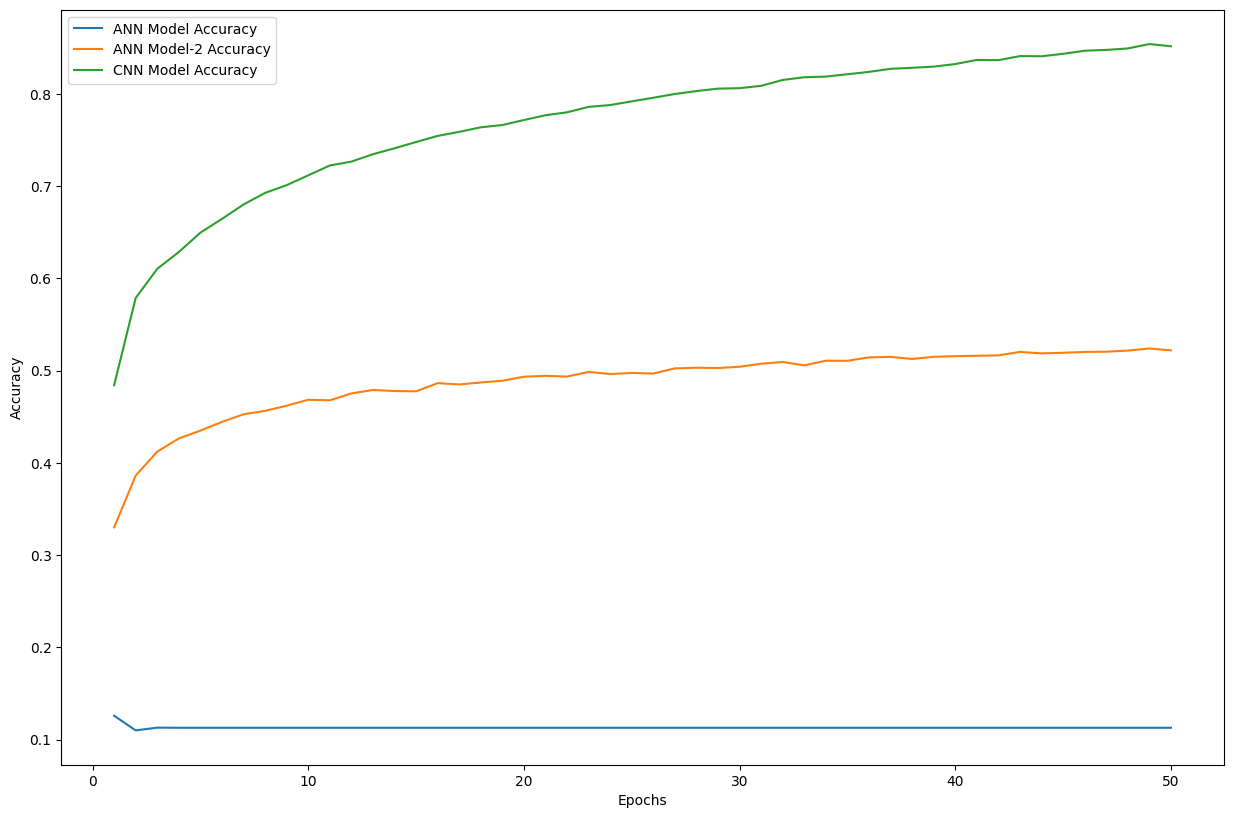

ANN model test accuracy : 0.11169999837875366
ANN model-2 test accuracy : 0.46540001034736633
CNN model test accuracy : 0.6046000123023987


In [19]:
ann_model_acc = ann_model_history.history['accuracy']
ann_model_2_acc = ann_model_2_history.history['accuracy']
cnn_model_acc = cnn_model_history.history['accuracy']

plt.figure(figsize=(15,10), dpi=100)

plt.plot(range(1, num_epochs+1), ann_model_acc, label = 'ANN Model Accuracy')
plt.plot(range(1, num_epochs+1), ann_model_2_acc, label = 'ANN Model-2 Accuracy')
plt.plot(range(1, num_epochs+1), cnn_model_acc, label = 'CNN Model Accuracy')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

print('ANN model test accuracy :', ann_model_eval[1])
print('ANN model-2 test accuracy :', ann_model_2_eval[1])
print('CNN model test accuracy :', cnn_model_eval[1])